In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [43]:
import pandas as pd
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king-pawn/kr-vs-kp.data')
dataset

,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,f.10,f.11,l,f.12,n,f.13,f.14,t,f.15,f.16,f.17,f.18,f.19,f.20,f.21,t.1,f.22,f.23,f.24,f.25,f.26,f.27,f.28,t.2,t.3,n.1,won
0,f,f,f,f,t,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,t,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,f,f,f,f,t,f,f,f,l,f,n,f,f,t,f,f,f,t,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,t,f,t,f,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,t,f,t,f,f,f,t,f,f,f,t,t,n,won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,t,f,f,f,f,f,t,f,f,f,f,t,l,f,b,f,f,t,f,f,f,f,t,t,f,t,f,f,t,f,f,t,f,t,f,n,nowin
3191,t,f,f,f,f,f,t,f,f,f,f,t,l,f,b,f,f,t,f,f,f,f,t,f,f,t,f,f,t,f,f,t,f,t,f,n,nowin
3192,t,f,f,f,f,f,t,f,f,f,f,t,l,f,n,f,f,t,f,f,f,f,t,f,f,t,f,f,t,f,f,t,f,t,f,n,nowin
3193,t,f,t,f,f,f,t,f,f,f,f,t,l,t,b,t,f,t,f,f,f,f,f,t,f,t,f,f,t,f,f,t,f,f,f,n,nowin


In [40]:
dataset.shape

(3195, 37)

In [41]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Modeling Data : ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Modeling Data : (2876, 37)
Unseen Data For Predictions: (319, 37)


In [46]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'won', session_id=123, silent=True) 

,Description,Value
0,session_id,123
1,Target,won
2,Target Type,Binary
3,Label Encoded,"nowin: 0, won: 1"
4,Original Data,"(2876, 37)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,36
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='won',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [59]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9906,0.9904,0.9943,0.9878,0.9910,0.9811,0.9813,0.018
lightgbm,Light Gradient Boosting Machine,0.9881,0.9994,0.9894,0.9877,0.9885,0.9761,0.9762,0.076
rf,Random Forest Classifier,0.9861,0.9979,0.9856,0.9876,0.9865,0.9721,0.9723,0.313
et,Extra Trees Classifier,0.9846,0.9968,0.9866,0.9839,0.9852,0.9691,0.9693,0.293
gbc,Gradient Boosting Classifier,0.9776,0.9967,0.9722,0.9847,0.9783,0.9552,0.9555,0.224
svm,SVM - Linear Kernel,0.9647,0.0000,0.9588,0.9732,0.9657,0.9294,0.9299,0.026
ada,Ada Boost Classifier,0.9622,0.9943,0.9693,0.9586,0.9638,0.9243,0.9247,0.153
lr,Logistic Regression,0.9578,0.9924,0.9616,0.9574,0.9594,0.9154,0.9157,0.066
knn,K Neighbors Classifier,0.9409,0.9828,0.9588,0.9297,0.9439,0.8815,0.8822,0.080
ridge,Ridge Classifier,0.9399,0.0000,0.9549,0.9312,0.9428,0.8795,0.8801,0.016


INFO:logs:create_model_container: 49
INFO:logs:master_model_container: 49
INFO:logs:display_container: 11
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:compare_models() succesfully completed......................................


In [57]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9752,0.9746,0.9905,0.9630,0.9765,0.9504,0.9508
2,0.9851,0.9857,0.9714,1.0000,0.9855,0.9703,0.9707
3,0.9801,0.9794,1.0000,0.9630,0.9811,0.9601,0.9609
4,0.9900,0.9897,1.0000,0.9811,0.9905,0.9801,0.9803
5,0.9851,0.9849,0.9904,0.9810,0.9856,0.9701,0.9702
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9950,0.9948,1.0000,0.9905,0.9952,0.9900,0.9901


INFO:logs:create_model_container: 35
INFO:logs:master_model_container: 35
INFO:logs:display_container: 10
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [49]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9356,0.9775,0.9619,0.9182,0.9395,0.8708,0.8719
1,0.9554,0.9785,0.9714,0.9444,0.9577,0.9106,0.9111
2,0.9158,0.9788,0.9333,0.9074,0.9202,0.8312,0.8316
3,0.9453,0.9850,0.9615,0.9346,0.9479,0.8903,0.8907
4,0.9552,0.9870,0.9519,0.9612,0.9565,0.9104,0.9104
5,0.9403,0.9809,0.9519,0.9340,0.9429,0.8804,0.8805
6,0.9652,0.9918,0.9808,0.9533,0.9668,0.9302,0.9306
7,0.9204,0.9730,0.9615,0.8929,0.9259,0.8402,0.8429
8,0.9403,0.9898,0.9519,0.9340,0.9429,0.8804,0.8805


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [50]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9752,0.9978,0.9905,0.9630,0.9765,0.9504,0.9508
1,0.9851,0.9988,0.9810,0.9904,0.9856,0.9703,0.9703
2,0.9505,0.9928,0.9333,0.9703,0.9515,0.9010,0.9017
3,0.9303,0.9895,0.9519,0.9167,0.9340,0.8603,0.8610
4,0.9652,0.9950,0.9808,0.9533,0.9668,0.9302,0.9306
5,0.9502,0.9913,0.9712,0.9352,0.9528,0.9002,0.9010
6,0.9701,0.9945,0.9615,0.9804,0.9709,0.9403,0.9405
7,0.9353,0.9807,0.9423,0.9333,0.9378,0.8704,0.8705
8,0.9453,0.9894,0.9423,0.9515,0.9469,0.8905,0.8905


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [51]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9505,0.9891,0.9333,0.9703,0.9515,0.9010,0.9017
1,0.9406,0.9957,0.8857,1.0000,0.9394,0.8816,0.8878
2,0.9257,0.9822,0.8857,0.9688,0.9254,0.8518,0.8552
3,0.9104,0.9907,0.9712,0.8707,0.9182,0.8199,0.8259
4,0.9403,0.9904,0.9038,0.9792,0.9400,0.8808,0.8836
5,0.9254,0.9884,0.9712,0.8938,0.9309,0.8501,0.8536
6,0.9453,0.9928,0.9135,0.9794,0.9453,0.8907,0.8928
7,0.9453,0.9936,0.9135,0.9794,0.9453,0.8907,0.8928
8,0.9154,0.9868,0.8558,0.9780,0.9128,0.8314,0.8384


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [55]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9505,0.9864,0.9619,0.9439,0.9528,0.9008,0.9009
1,0.9158,0.9776,0.9429,0.9000,0.9209,0.8311,0.8321
2,0.9505,0.9859,0.9619,0.9439,0.9528,0.9008,0.9009
3,0.9453,0.9917,0.9712,0.9266,0.9484,0.8902,0.8913
4,0.9453,0.9904,0.9519,0.9429,0.9474,0.8904,0.8904
5,0.9403,0.9853,0.9712,0.9182,0.9439,0.8802,0.8818
6,0.9552,0.9901,0.9712,0.9439,0.9573,0.9102,0.9107
7,0.9353,0.9853,0.9615,0.9174,0.9390,0.8703,0.8714
8,0.9403,0.9878,0.9712,0.9182,0.9439,0.8802,0.8818


INFO:logs:create_model_container: 33
INFO:logs:master_model_container: 33
INFO:logs:display_container: 8
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [60]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9901,0.9997,1.0000,0.9813,0.9906,0.9802,0.9803
1,0.9851,0.9981,0.9810,0.9904,0.9856,0.9703,0.9703
2,0.9752,0.9951,0.9524,1.0000,0.9756,0.9505,0.9517
3,0.9453,0.9913,0.9519,0.9429,0.9474,0.8904,0.8904
4,0.9652,0.9961,0.9712,0.9619,0.9665,0.9302,0.9303
5,0.9652,0.9939,0.9712,0.9619,0.9665,0.9302,0.9303
6,0.9751,0.9948,0.9712,0.9806,0.9758,0.9502,0.9503
7,0.9552,0.9831,0.9519,0.9612,0.9565,0.9104,0.9104
8,0.9602,0.9910,0.9519,0.9706,0.9612,0.9204,0.9205


INFO:logs:create_model_container: 50
INFO:logs:master_model_container: 50
INFO:logs:display_container: 12
INFO:logs:LogisticRegression(C=9.984, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


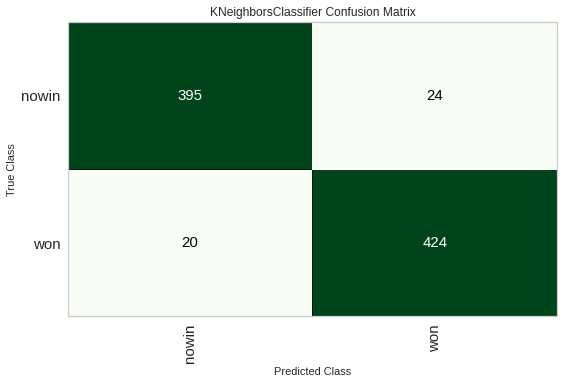

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [61]:
plot_model(tuned_knn, plot = 'confusion_matrix')

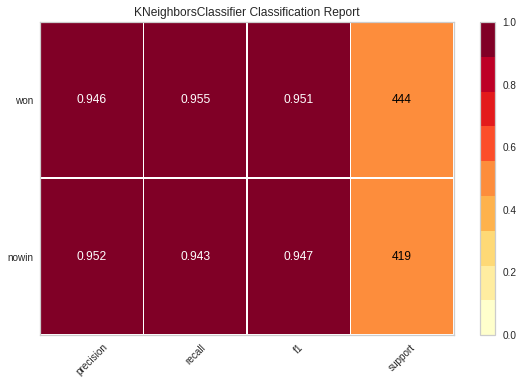

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [62]:
plot_model(tuned_knn, plot = 'class_report')

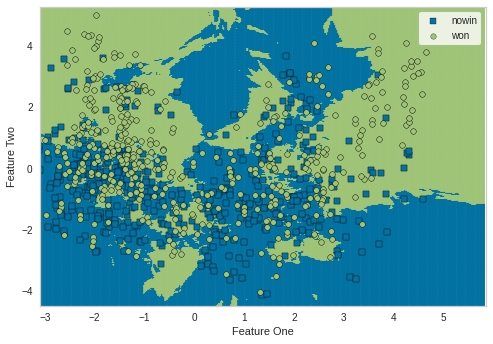

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [63]:
plot_model(tuned_knn, plot='boundary')

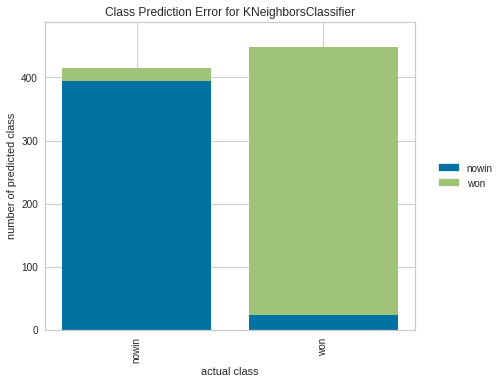

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [64]:
plot_model(tuned_knn, plot = 'error')

In [65]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [66]:
predict_model(tuned_knn);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.949,0.9874,0.955,0.9464,0.9507,0.8979,0.898


In [67]:
final_knn = finalize_model(tuned_knn)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom

In [68]:
print(final_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')


In [69]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0,0.9951,0,0,0,0,0


,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,f.10,f.11,l,f.12,n,f.13,f.14,t,f.15,f.16,f.17,f.18,f.19,f.20,f.21,t.1,f.22,f.23,f.24,f.25,f.26,f.27,f.28,t.2,t.3,n.1,won,Label,Score
0,f,f,f,f,f,f,f,f,t,f,f,f,l,f,n,f,f,t,f,f,f,t,f,t,f,t,f,f,f,f,f,f,f,t,t,n,won,won,0.7647
1,f,f,f,f,f,f,f,f,t,f,t,f,l,f,n,f,f,t,f,f,f,t,f,f,f,t,f,f,f,f,t,f,f,t,t,n,won,won,0.7059
2,f,f,f,f,t,f,f,f,t,f,t,f,l,f,n,f,f,t,f,f,f,t,f,f,f,t,f,f,f,f,t,f,f,t,t,n,won,won,0.7647
3,f,f,f,f,f,f,f,f,t,f,t,f,l,f,n,f,f,t,f,f,f,t,f,t,f,t,f,f,f,f,f,f,f,t,t,n,won,won,0.7059
4,f,f,f,f,f,f,f,f,t,f,t,f,l,f,n,f,f,t,f,f,f,t,f,t,f,t,f,f,f,f,t,f,f,t,t,n,won,won,0.6471
